In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup


def scrape_election_results(url):
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Failed to load page {url}")
    
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table')  # Update this selector based on the actual table structure
    
    if table is None:
        print(soup.prettify())  # Print the HTML content for inspection
        raise Exception("Table not found on the page. Check the structure of the page and update the scraping logic.")
    
    rows = table.find_all('tr')
    
    data = []
    for row in rows:
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        if cols:  # Only append non-empty rows
            data.append(cols)
    
    if not data:
        raise Exception("No data found in the table. Check the table structure and ensure it's correctly selected.")
    
    # Example: Define columns based on table structure
    columns = ["Party Name", "Seats Won", "Leading/Trailing", "Total Seats"]  # Update columns as per actual data
    df = pd.DataFrame(data, columns=columns)
    return df

url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm'  # Update with the actual URL
try:
    df = scrape_election_results(url)
    df.to_csv('raw_data.csv', index=False)
    print(df.head())
except Exception as e:
    print(e)

# Load the data
df = pd.read_csv('raw_data.csv')

                            Party Name Seats Won Leading/Trailing Total Seats
0         Bharatiya Janata Party - BJP       240                0         240
1       Indian National Congress - INC        99                0          99
2                 Samajwadi Party - SP        37                0          37
3  All India Trinamool Congress - AITC        29                0          29
4      Dravida Munnetra Kazhagam - DMK        22                0          22


In [2]:
# Insight 1: Total seats won by each party
total_seats = df['Seats Won'].sum()
print(f"Total seats: {total_seats}")

Total seats: 543


In [3]:
# Insight 2: Party with the highest number of seats
top_party = df.loc[df['Seats Won'].idxmax()]
print(f"Party with the highest number of seats: {top_party['Party Name']} with {top_party['Seats Won']} seats")

Party with the highest number of seats: Bharatiya Janata Party - BJP with 240 seats


In [4]:
# Insight 3: Party with the lowest number of seats
bottom_party = df.loc[df['Seats Won'].idxmin()]
print(f"Party with the lowest number of seats: {bottom_party['Party Name']} with {bottom_party['Seats Won']} seats")

Party with the lowest number of seats: United People’s Party, Liberal - UPPL with 1 seats


In [5]:
# Insight 4: Total seats won by parties with more than the average number of seats
average_seats = df['Seats Won'].mean()
above_average_parties = df[df['Seats Won'] > average_seats]
total_above_average_seats = above_average_parties['Seats Won'].sum()
print(f"Total seats won by parties with more than the average number of seats: {total_above_average_seats}")


Total seats won by parties with more than the average number of seats: 443


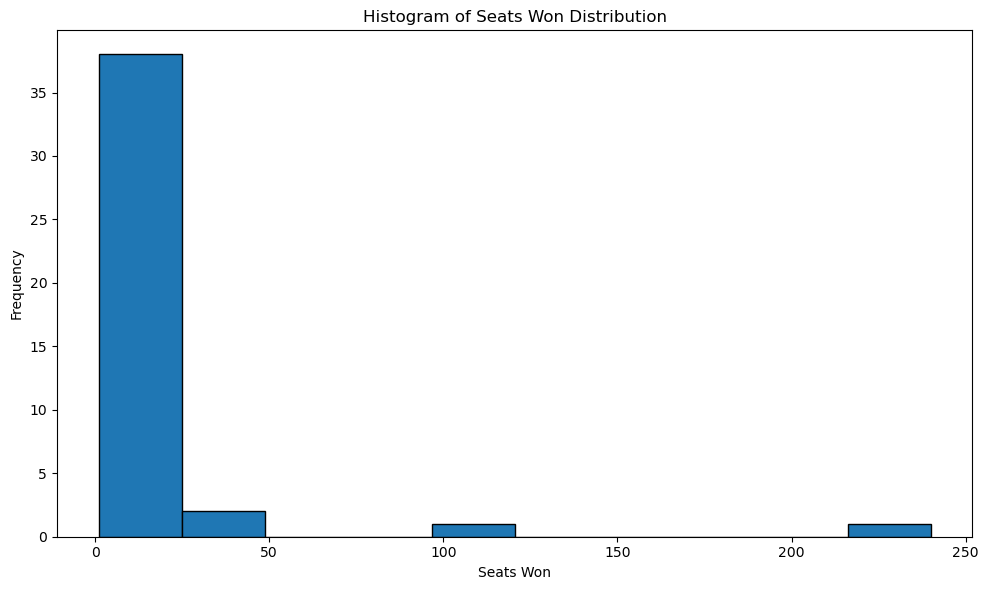

In [6]:
# Insight 5: Histogram of seats won distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Seats Won'].dropna(), bins=10, edgecolor='k')
plt.xlabel('Seats Won')
plt.ylabel('Frequency')
plt.title('Histogram of Seats Won Distribution')
plt.tight_layout()
plt.savefig('histogram_of_seats_won.png')
plt.show()


In [7]:
# Insight 6: Proportion of parties winning at least one seat
parties_with_seats = df[df['Seats Won'] > 0].shape[0]
proportion_with_seats = parties_with_seats / df.shape[0]
print(f"Proportion of parties winning at least one seat: {proportion_with_seats}")


Proportion of parties winning at least one seat: 1.0


In [9]:
# Insight 8: Comparison of seats won by top 3 vs. bottom 3 parties
top_3_seats = df.nlargest(3, 'Seats Won')['Seats Won'].sum()
bottom_3_seats = df.nsmallest(3, 'Seats Won')['Seats Won'].sum()
print(f"Total seats won by top 3 parties: {top_3_seats}")
print(f"Total seats won by bottom 3 parties: {bottom_3_seats}")

Total seats won by top 3 parties: 376
Total seats won by bottom 3 parties: 3


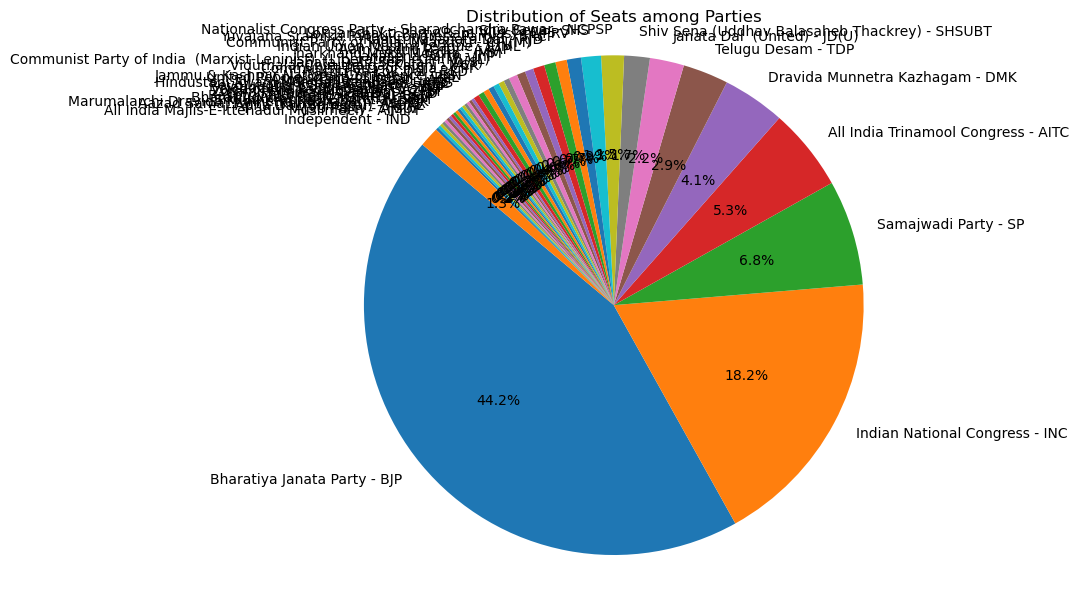

In [10]:
# Insight 9: Distribution of seats among parties (pie chart)
plt.figure(figsize=(10, 6))
plt.pie(df['Seats Won'], labels=df['Party Name'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Seats among Parties')
plt.tight_layout()
plt.savefig('distribution_of_seats_piechart.png')
plt.show()

In [11]:
# Insight 10: Number of parties winning seats in different ranges (e.g., 0-5, 6-10, etc.)
bins = [0, 5, 10, 20, 50, 100, df['Seats Won'].max()]
labels = ['0-5', '6-10', '11-20', '21-50', '51-100', '100+']
df['Seat Range'] = pd.cut(df['Seats Won'], bins=bins, labels=labels)
seat_range_counts = df['Seat Range'].value_counts().sort_index()
print("Number of parties winning seats in different ranges:")
print(seat_range_counts)

Number of parties winning seats in different ranges:
0-5       31
6-10       4
11-20      2
21-50      3
51-100     1
100+       1
Name: Seat Range, dtype: int64


In [12]:
# Save the insights to a CSV file
df.to_csv('election_insights_additional.csv', index=False)